In [2]:
setwd('/import/liujing/data/my')

In [3]:
load('./data.rda')

In [4]:
library(dplyr)

Warning message:
"package 'dplyr' was built under R version 4.2.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [5]:
expr = data %>%  dplyr::filter(Group == 1) %>%  dplyr::select(c('TNFSF14','CCNA2','MARCKS','SGOL1','SAP130'))

In [6]:
dim(expr)

[1] 59  5

In [7]:
nmfinput = as.data.frame(t(expr))

In [8]:
library(NMF)

Loading required package: registry

Warning message:
"package 'registry' was built under R version 4.2.3"
Loading required package: rngtools

Warning message:
"package 'rngtools' was built under R version 4.2.3"
Loading required package: cluster

Warning message:
"package 'cluster' was built under R version 4.2.3"
NMF - BioConductor layer [OK] | Shared memory capabilities [NO: bigmemory] | Cores 2/2

  To enable shared memory capabilities, try: install.extras('
NMF
')



In [9]:
ranks <- 1:10
estim.coad <- nmf(nmfinput,ranks, nrun=10)
duplicated(colnames(nmfinput))

Warning message in cor(d.consensus, d.coph, method = "pearson"):
"the standard deviation is zero"


[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE

Warning message:
"Removed 3 rows containing missing values (`geom_line()`)."
Warning message:
"Removed 11 rows containing missing values (`geom_point()`)."


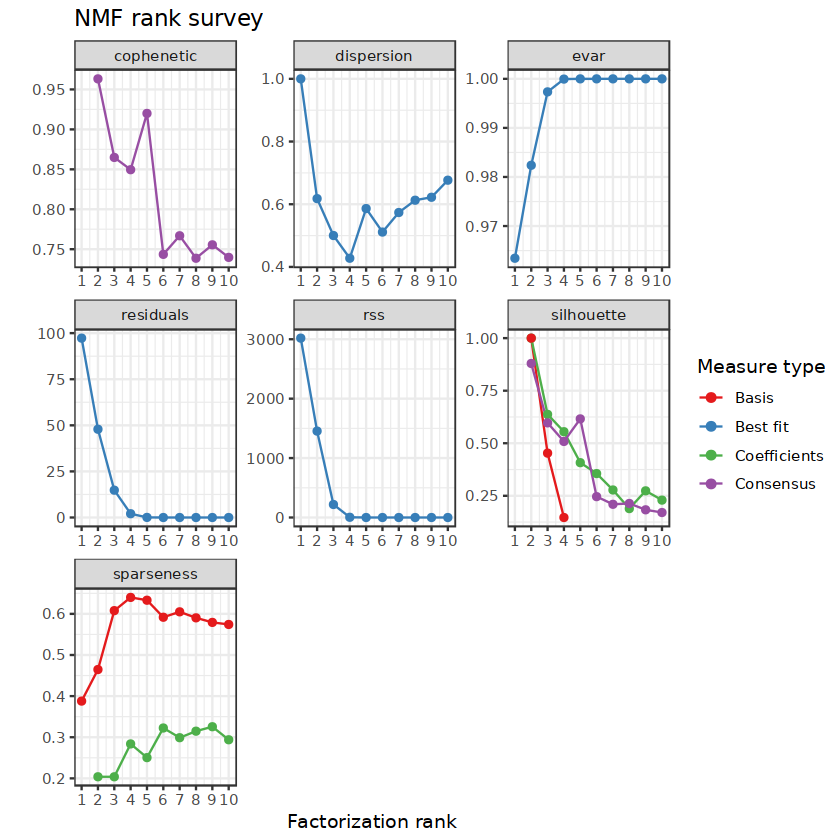

In [10]:
plot(estim.coad)

In [11]:
seed = 2020820
nmf.rank4 <- nmf(nmfinput, 
                 rank = 2, 
                 nrun=50,
                 seed = seed, 
                 method = "brunet")

group
 1  2 
 9 50 

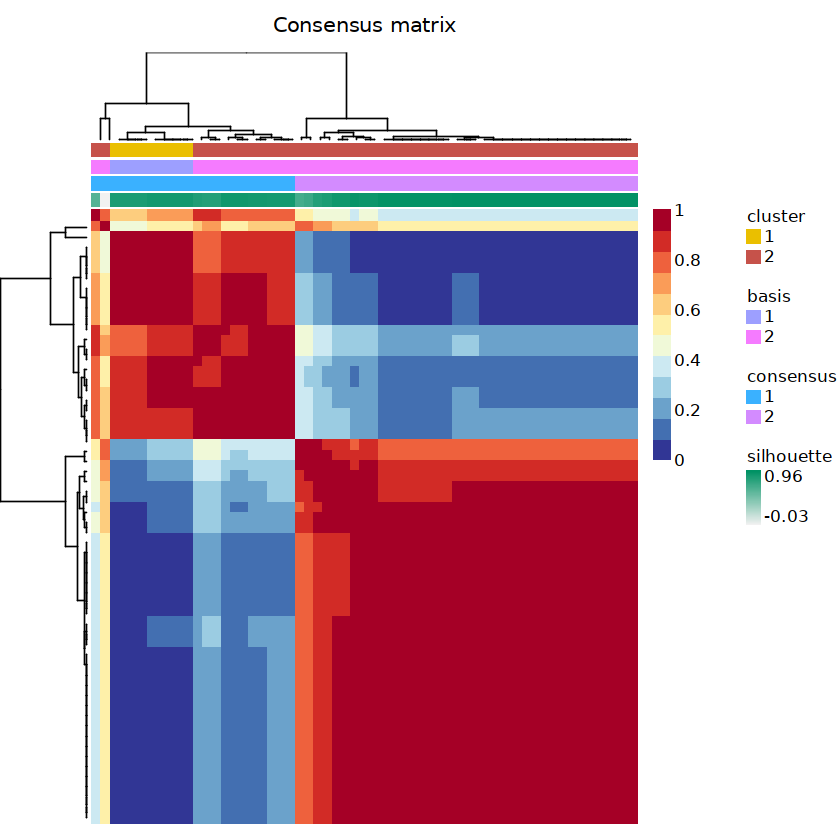

In [12]:
jco <- c("#EABF00","#C6524A","#868686")
index <- extractFeatures(nmf.rank4,"max") 
sig.order <- unlist(index)
NMF.Exp.rank4 <- nmfinput[sig.order,]
NMF.Exp.rank4 <- na.omit(NMF.Exp.rank4) #sig.order有时候会有缺失值
group <- predict(nmf.rank4) # 提出亚型
table(group)
consensusmap(nmf.rank4,
             labRow = NA,
             labCol = NA,
             annCol = data.frame("cluster"=group[colnames(NMF.Exp.rank4)]),
             annColors = list(cluster=c("1"=jco[1],"2"=jco[2])))

In [13]:
library(tinyarray)



Registered S3 methods overwritten by 'treeio':
  method              from    
  MRCA.phylo          tidytree
  MRCA.treedata       tidytree
  Nnode.treedata      tidytree
  Ntip.treedata       tidytree
  ancestor.phylo      tidytree
  ancestor.treedata   tidytree
  child.phylo         tidytree
  child.treedata      tidytree
  full_join.phylo     tidytree
  full_join.treedata  tidytree
  groupClade.phylo    tidytree
  groupClade.treedata tidytree
  groupOTU.phylo      tidytree
  groupOTU.treedata   tidytree
  is.rooted.treedata  tidytree
  nodeid.phylo        tidytree
  nodeid.treedata     tidytree
  nodelab.phylo       tidytree
  nodelab.treedata    tidytree
  offspring.phylo     tidytree
  offspring.treedata  tidytree
  parent.phylo        tidytree
  parent.treedata     tidytree
  root.treedata       tidytree
  rootnode.phylo      tidytree
  sibling.phylo       tidytree




Attaching package: 'tinyarray'


The following object is masked from 'package:dplyr':

    union_all




In [14]:
dim(nmfinput)

[1]  5 59

In [15]:
a =t(expr) %>%  as.data.frame()

In [16]:
cg=names(tail(sort(apply(a,1,sd)),2000))
n=a[cg,]

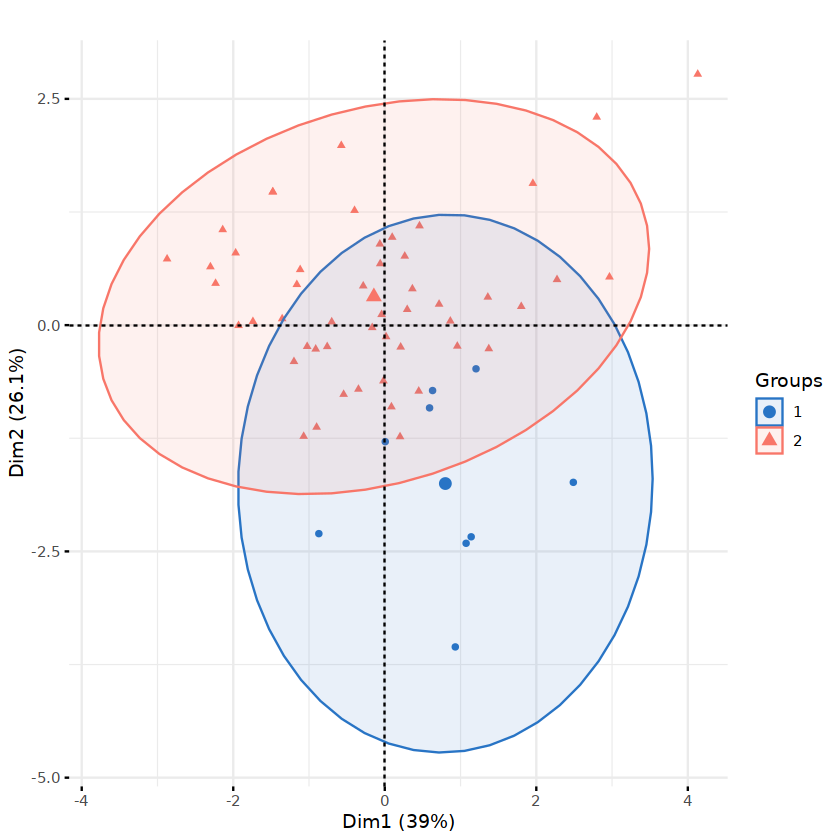

In [17]:
draw_pca(n,group)

In [18]:
library(Rtsne)
tsne_out = Rtsne(t(n),perplexity = 10)
pdat = data.frame(tsne_out$Y,factor(group))
colnames(pdat) = c("Y1","Y2","group")
head(pdat)

,Y1,Y2,group
,<dbl>,<dbl>,<fct>
CI10_M1,1.758022,5.605102,2
CI11_M1,-1.180212,-4.169590,2
CI12_M1,3.715478,-4.624247,2
CI13_M1,1.378387,-8.936364,2
CI14_M1,-3.901850,6.133768,2
CI15_M1,1.975330,3.027414,1


In [19]:
pdat1 = pdat %>% tibble::rownames_to_column(.,'sample')

In [20]:
bulk3.group = pdat1[,c(1,4)]

In [21]:
write.csv(bulk3.group,file = 'bulk.3.group.csv',row.names =F)

Warning message:
"package 'ggplot2' was built under R version 4.2.3"


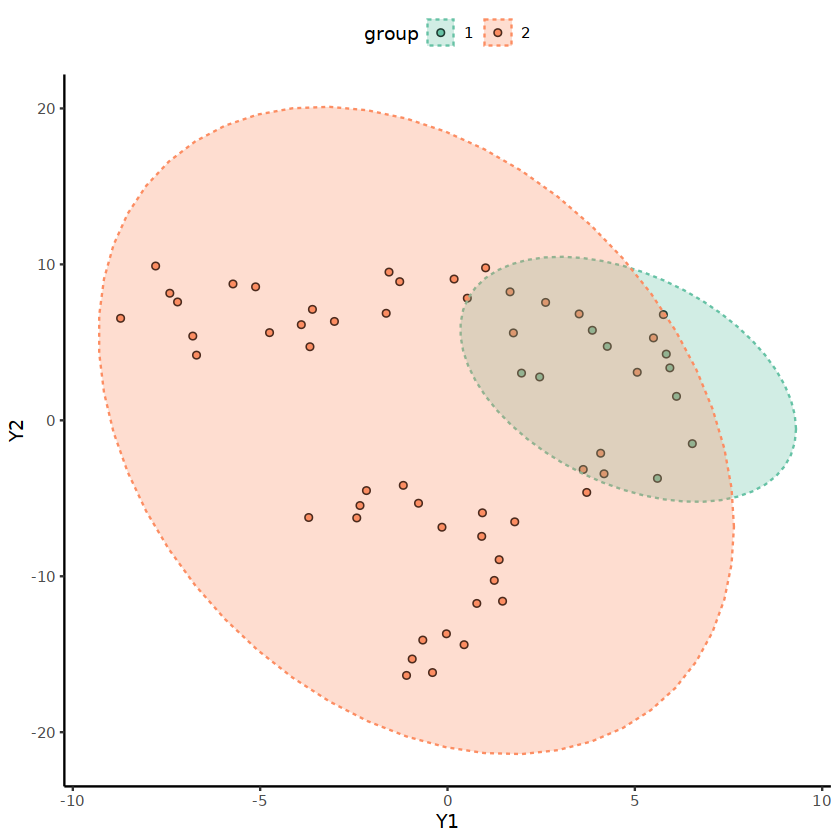

In [22]:
library(ggplot2)
library(paletteer)
ggplot(pdat,aes(Y1,Y2))+
  geom_point(aes(Y1,Y2,fill = group),shape = 21,color = "black")+
  stat_ellipse(aes(color = group,fill = group),
               geom = "polygon",
               alpha = 0.3,
               linetype = 2)+
  scale_color_paletteer_d("RColorBrewer::Set2")+
  scale_fill_paletteer_d("RColorBrewer::Set2")+
  theme_classic()+
  theme(legend.position = "top")

In [23]:
groupinfo = as.data.frame(group)

In [24]:
save(nmfinput,groupinfo,file = 'bulk2.rda')

In [25]:
write.csv(pdat,file = 'nmf.group.csv')

In [69]:
e = cbind(pdat,expr) 

In [70]:
tend =e[,3:8]

In [71]:
head(tend,2)

,group,TNFSF14,CCNA2,MARCKS,SGOL1,SAP130
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CI10_M1,2,12.33071,1.3665421,13.45120,0.9586298,11.27051
CI11_M1,2,26.09770,0.8565347,22.73914,0.4597942,13.74484


In [72]:
colnames(tend)[1] = 'Group'

In [73]:
.libPaths()

[1] "/root/miniconda3/envs/metadoc/lib/R/library"
[2] "/root/miniconda3/envs/Rdoc/lib/R/library"

In [74]:
.libPaths(c('/root/miniconda3/envs/metadoc/lib/R/library','/root/miniconda3/envs/Rdoc/lib/R/library'))

In [75]:
require(cowplot)
require(tidyverse)
require(ggplot2)
require(ggsci)
require(ggpubr)

In [76]:
mydata<-tend %>% 
  ## 基因表达数据gather,gather的范围应调整
  gather(key="gene",value="Expression",TNFSF14:SAP130) %>% 
  ##
  dplyr::select(Group,gene,Expression) 

In [77]:
compare_means( Expression ~ Group, data = mydata, method = 't.test',
              group.by = "gene")
# Box plot facetted by "gene"
p <- ggboxplot(mydata, x = "Group", y = "Expression",
          color = "Group", palette = "jco",
          add = "jitter",
          facet.by = "gene", short.panel.labs = FALSE)
# Use only p.format as label. Remove method name.
#p + stat_compare_means(label =  "p.signif", label.x = 1.5)
p <- ggboxplot(mydata, x = "gene", y = "Expression",
          color = "Group", palette = "nejm",
          add = "jitter")

gene,.y.,group1,group2,p,p.adj,p.format,p.signif,method
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
TNFSF14,Expression,1,2,2.428223e-01,7.3e-01,0.2428,ns,T-test
CCNA2,Expression,1,2,5.281177e-01,1.0e+00,0.5281,ns,T-test
MARCKS,Expression,1,2,7.171770e-07,3.6e-06,7.2e-07,****,T-test
SGOL1,Expression,1,2,8.572042e-01,1.0e+00,0.8572,ns,T-test
SAP130,Expression,1,2,9.625881e-03,3.9e-02,0.0096,**,T-test


In [78]:
diffgene = as.data.frame(compare_means( Expression ~ Group, data = mydata, method = 't.test',
              group.by = "gene"))

In [79]:
diffgene = rownames(diffgene) = diffgene[,1]

options(repr.plot.height = 5,repr.plot.width = 21)

options(repr.plot.width = 7,repr.plot.height = 5)

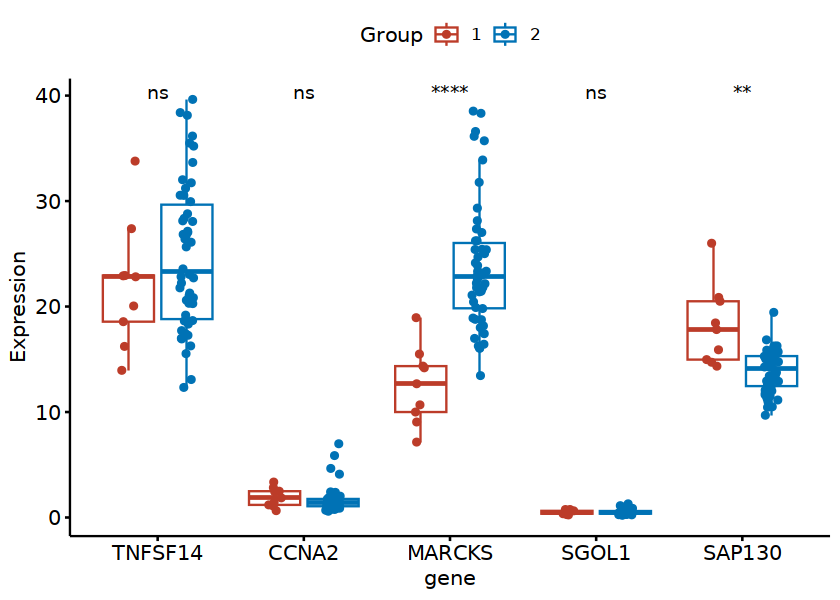

In [80]:
p + stat_compare_means(aes(group = Group), label = "p.signif",method = 't.test')